# Selección y limpieza de datos 
## Juan Manuel González Ascencio
## Diana Gonzalez Munguia
## Sebastián Romero Velasco
## Jaime Ernesto Aguilar Trejo

------
### Eliminar las columnas o variables no relevantes al dominio o contexto del proyecto.

In [31]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load the data
df = pd.read_excel("BD_TR.xlsx", sheet_name="Casetas")
df.head()

,Unidad,TAG,Flota,EC,Fecha,Sistema,Costo Caseta,Semana,Mes
0,1636,CPFI11071128,Liverpool Local,EC-01,2024-01-01 23:52:54,CAPUFE,444.0,1,1
1,1827,CPFI11071066,Full Liver,EC-01,2024-01-01 00:00:00,CAPUFE,557.0,1,1
2,1637,CPFI11071126,Liverpool Local,EC-01,2024-01-01 00:00:00,CAPUFE,51.0,1,1
3,1630,CPFI11047526,Liverpool Local,EC-01,2024-01-01 00:00:00,CAPUFE,239.0,1,1
4,1827,CPFI11071066,Full Liver,EC-01,2024-01-01 00:00:00,CAPUFE,251.0,1,1


Al analizar un poco el dataframe nos damos cuenta que la hoja que nos interesa es la de casetas, por lo que unicamente tomaremos los valores de ahí. 

Viendo un poco las columnas, podemos ver que Flota, EC y mes unicamente contienen un registro y es el mismo.
- Flota: Full Liver
- EC: EC-01
- Mes: 1

Considerando esto no nos aporta valor mantenerlas, pero hay que ser consiente que exiten y cuales eran sus valores en caso de que en un futuro sea necesario.

In [17]:
columnas_no_relevantes = ['Flota', 'EC', 'Mes']

# Eliminar columnas no relevantes
#df = df.drop(columnas_no_relevantes, axis=1)
df.head()

,Unidad,TAG,Fecha,Sistema,Costo Caseta,Semana
0,1636,CPFI11071128,2024-01-01 23:52:54,CAPUFE,444.0,1
1,1827,CPFI11071066,2024-01-01 00:00:00,CAPUFE,557.0,1
2,1637,CPFI11071126,2024-01-01 00:00:00,CAPUFE,51.0,1
3,1630,CPFI11047526,2024-01-01 00:00:00,CAPUFE,239.0,1
4,1827,CPFI11071066,2024-01-01 00:00:00,CAPUFE,251.0,1


<Axes: >

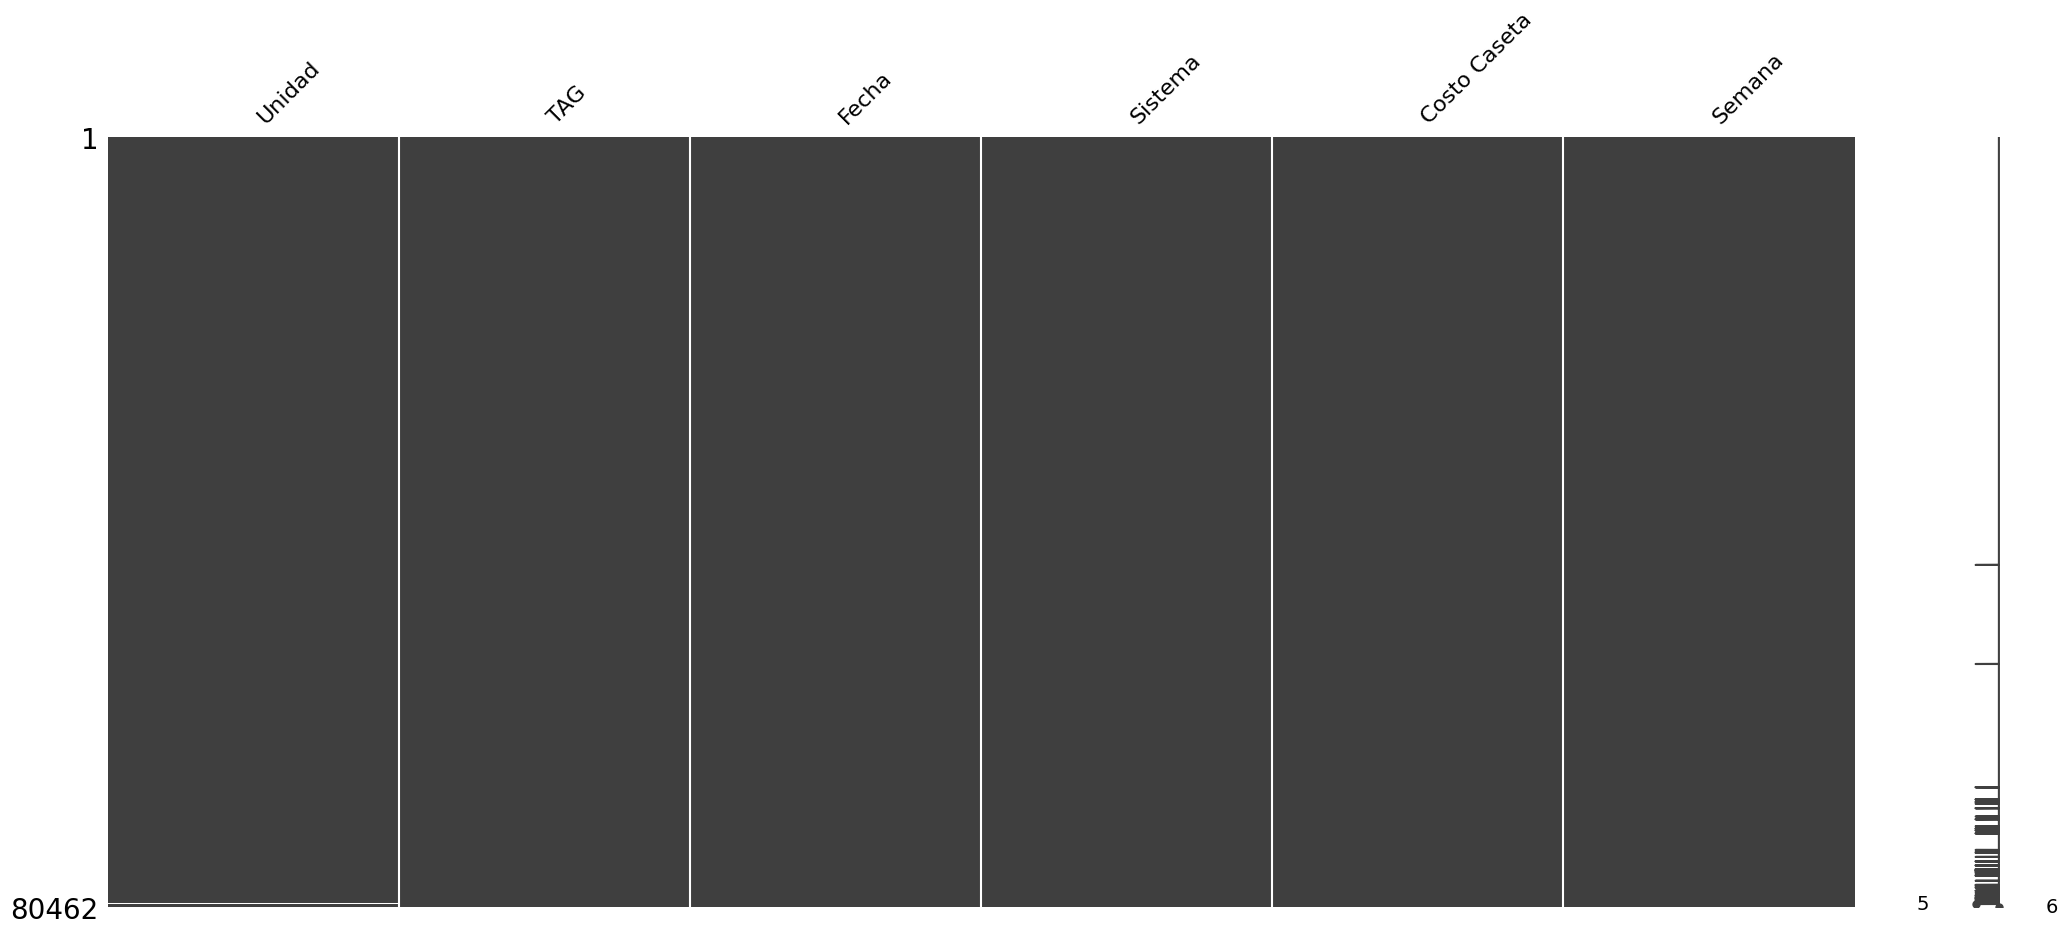

In [18]:
msno.matrix(df)

Con esto vemos que no tenemos ningún registro faltante, lo que es bueno

## Datos atípicos

En esta parte unicamnte vamos a analizar la columna de precio, ya que no tiene sentido analizar las semas.

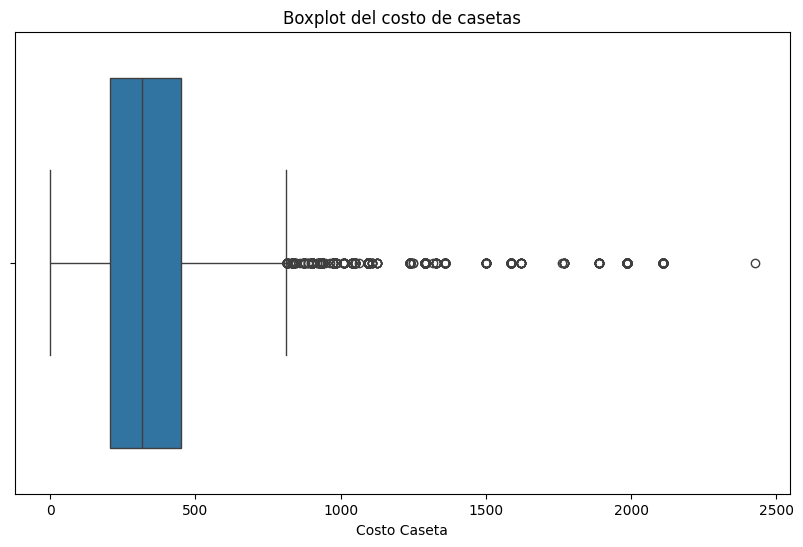

In [27]:
#sacamos el boxplot de la columna precio 

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Costo Caseta'])
plt.title('Boxplot del costo de casetas')
plt.show()

In [28]:
df['Costo Caseta'].describe()

count    80462.000000
mean       357.569555
std        217.719546
min          0.000000
25%        205.000000
50%        316.000000
75%        449.000000
max       2425.000000
Name: Costo Caseta, dtype: float64

Realmente la distribución de los valores se ve normal, ya que es el costo de las casetas. Lo unicó que hace un poco de ruido es el tener caseras que cuesten 0, vamos a investigar un poco mas de eso

In [30]:
#contamos cuantos registros de costo de casetas hay con valor 0

df[df['Costo Caseta'] == 0].shape[0] #Solo hay dos 

#Traemos esos registros

df[df['Costo Caseta'] == 0]

,Unidad,TAG,Fecha,Sistema,Costo Caseta,Semana
6901,1665,OHLM01632749,2024-01-08,Televia,0.0,2
7113,1673,OHLM01632808,2024-01-08,Televia,0.0,2


Podemos ver que son dos registros los cuales sucedieron el mismo día, por lo que podemos asumir que fue que las caseta no estaba funcionando o que estaba tomada, pero no podemos quitarlos ya que pueden ser valores normales.

# Resumen
Esto nos ayudo a identificar que no hubiera valores raros o faltantes en el costo de las casetas, eliminamos columnas que no nos era útiles y detectamos dos casos de costo 0, pero no alteramos mas la información ya que se ve bien.